In [339]:
import pandas as pd

In [340]:
df=pd.read_csv('/Users/jghosh2/Desktop/tensoriot/takehome_user_engagement 1.csv')

In [341]:
# Assuming df is your DataFrame and it has columns 'user_id' and 'DateTime'
# Convert 'DateTime' to datetime if it's not already
df['DateTime'] = pd.to_datetime(df['time_stamp'])

# Remove time part and keep only the date
df['Date'] = df['DateTime'].dt.date

# Remove duplicate dates for the same user
df_unique_logins = df.drop_duplicates(subset=['user_id', 'Date'])

# Sort the DataFrame
df_unique_logins = df_unique_logins.sort_values(by=['user_id', 'DateTime'])


In [342]:
# Function to check if a user is an adopted user
def is_adopted(user_group):
    user_group.set_index('DateTime', inplace=True)
    return user_group['user_id'].rolling('7D').count().max() >= 3

# Group by user_id and apply the check function
adopted_users = df_unique_logins.groupby('user_id').apply(is_adopted)

# Get the list of adopted user IDs
adopted_user_ids = adopted_users[adopted_users].index.tolist()

#print("Adopted User IDs:", adopted_user_ids)


In [343]:
df2=pd.read_csv('/Users/jghosh2/Desktop/tensoriot/takehome_users_2.csv',encoding='latin-1')

In [344]:
def is_adopted_count(object_id):
    p=0
    if object_id  in adopted_user_ids:
        p=1
    return p
    

In [345]:
df2['is_adopted']=df2['object_id'].apply(is_adopted_count)

In [346]:
df2['is_adopted_other_user']=df2['invited_by_user_id'].apply(is_adopted_count)

In [347]:
df2["org_id"]=df2["org_id"].astype('str')
df2["invited_by_user_id"]=df2["invited_by_user_id"].astype('str')

In [348]:
df3=df2[df2['is_adopted']==1]

In [349]:
df3

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,is_adopted_other_user
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1,1
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,nan,1,0
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1,0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,nan,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,11965,2014-04-25 07:17:35,Storey Lewis,LewisStorey@cuvox.de,GUEST_INVITE,1.400657e+09,0,0,65,11251.0,1,0
11966,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,1.401524e+09,0,0,15,5688.0,1,0
11968,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0,1,0
11974,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,0


In [350]:
df3['creation_source'].value_counts()

ORG_INVITE            553
GUEST_INVITE          360
SIGNUP                293
SIGNUP_GOOGLE_AUTH    232
PERSONAL_PROJECTS     164
Name: creation_source, dtype: int64

In [351]:
df3['opted_in_to_mailing_list'].value_counts()

0    1188
1     414
Name: opted_in_to_mailing_list, dtype: int64

In [352]:
df3['enabled_for_marketing_drip'].value_counts()

0    1356
1     246
Name: enabled_for_marketing_drip, dtype: int64

In [353]:
df3['org_id'].value_counts()[:10]

7     16
4     16
2     15
1     14
9     14
13    14
3     14
5     12
62    12
0     11
Name: org_id, dtype: int64

In [354]:
df3['invited_by_user_id'].value_counts()

nan        689
10628.0      4
2354.0       4
4019.0       3
2771.0       3
          ... 
2998.0       1
4497.0       1
9764.0       1
7024.0       1
6647.0       1
Name: invited_by_user_id, Length: 744, dtype: int64

In [355]:
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,is_adopted_other_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,nan,0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,nan,0,0


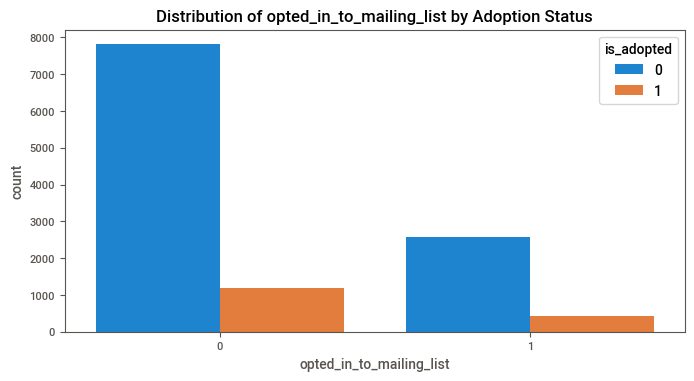

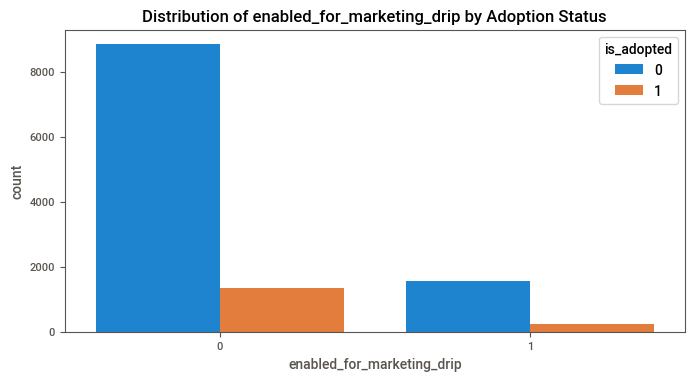

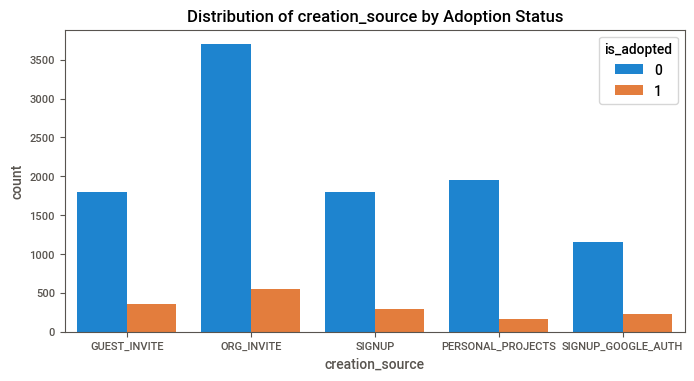

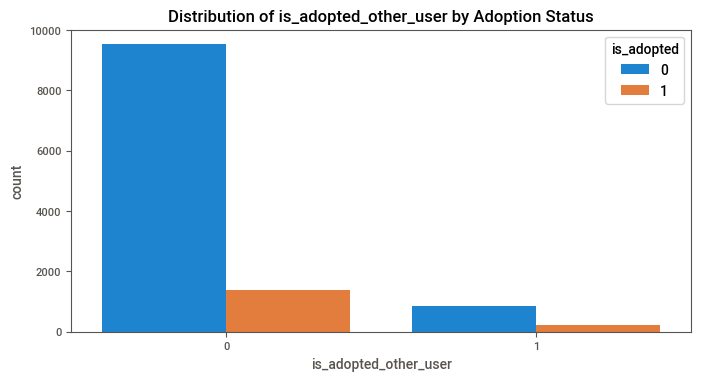

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source','is_adopted_other_user']
for i in cols:
    plt.figure(figsize=(8, 4))  # Optional: Adjust the size of the plot
    sns.countplot(data=df2, x=i, hue="is_adopted")
    plt.title(f'Distribution of {i} by Adoption Status')  # Adding a title to each plot
    plt.show()  #


In [357]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance

# Sample DataFrame: df
# Assuming 'is_adopted' is the target variable and the rest are features
df2=df2.fillna(0)
#drop irrelevent column
df2=df2.drop(['creation_time','last_session_creation_time','email','name','object_id'],axis=1)
# Preprocessing: Convert categorical variables to numerical
label_encoders = {}
for column in df2.select_dtypes(include=['category', 'object']).columns:
    label_encoders[column] = LabelEncoder()
    print(column)
    df2[column] = label_encoders[column].fit_transform(df2[column])

creation_source
org_id
invited_by_user_id


In [358]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   creation_source             12000 non-null  int64
 1   opted_in_to_mailing_list    12000 non-null  int64
 2   enabled_for_marketing_drip  12000 non-null  int64
 3   org_id                      12000 non-null  int64
 4   invited_by_user_id          12000 non-null  int64
 5   is_adopted                  12000 non-null  int64
 6   is_adopted_other_user       12000 non-null  int64
dtypes: int64(7)
memory usage: 656.4 KB


In [359]:
df2

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,is_adopted_other_user
0,0,1,0,13,177,0,0
1,1,0,0,1,913,1,0
2,1,0,0,411,517,0,1
3,0,0,0,1,1405,0,1
4,0,0,0,105,1428,0,1
...,...,...,...,...,...,...,...
11995,1,0,0,405,2170,0,0
11996,4,0,0,114,2564,0,0
11997,0,1,1,399,2130,0,0
11998,2,0,0,373,2564,0,0


[0.12468608 0.15245587 0.1601797  0.15596636 0.16032094 0.24639113]


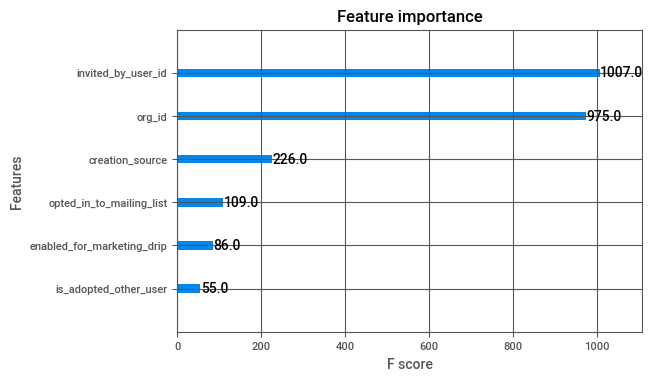

In [360]:
# Splitting the dataset
X = df2.drop('is_adopted', axis=1)  # Features
y = df2['is_adopted']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xg = XGBClassifier()
xg.fit(X_train, y_train)

# Getting feature importances
# feature importance
print(xg.feature_importances_)
plot_importance(xg)
plt.show()

In [1]:
from itertools import chain, combinations

def get_all_combinations(lst):
    # Convert the list elements to tuples
    lst = tuple(lst)
    
    # Generate all combinations
    all_combinations = chain.from_iterable(combinations(lst, r) for r in range(len(lst)+1))
    
    # Convert the combinations to lists
    all_combinations = [list(combination) for combination in all_combinations]
    
    return all_combinations

# Example
my_list = [1, 2, 3]
result = get_all_combinations(my_list)
print(result)

[[], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]
